multi-layer nets-PyTorch

In [ ]:
import numpy as np
import torch
import torchvision

In [ ]:
a = np.random.rand(2,3)
print(a)

b = torch.from_numpy(a)
print(b)

[[0.97329184 0.8184028  0.53794621]
 [0.32927566 0.48143315 0.27906962]]
tensor([[0.9733, 0.8184, 0.5379],
        [0.3293, 0.4814, 0.2791]], dtype=torch.float64)


The idea in Torch is that tensors allow for easy forward (function evaluations) and backward (gradient) passes.

In [ ]:
A = torch.rand(2,2)
b = torch.rand(2,1)
x = torch.rand(2,1, requires_grad=True)

y = torch.matmul(A,x) + b

print(y)
z = y.sum()
print(z)
z.backward()
print(x.grad)
print(x)

tensor([[0.9972],
        [0.7688]], grad_fn=<AddBackward0>)
tensor(1.7660, grad_fn=<SumBackward0>)
tensor([[0.8651],
        [1.3324]])
tensor([[0.0328],
        [0.7595]], requires_grad=True)


The backward pass computed the gradients using autograd.

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())


In [ ]:
print(len(trainingdata),len(testdata))

60000 10000


In [ ]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


It is a tensor, not an array. We need to postprocess to use matplotlib.

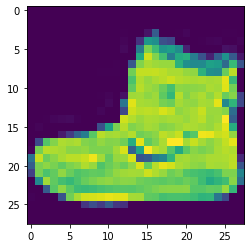

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=64, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=False)

In [ ]:
images, labels = iter(trainDataLoader).next()
print(images.size(), labels)

torch.Size([64, 1, 28, 28]) tensor([2, 7, 3, 6, 3, 7, 4, 9, 2, 6, 4, 9, 5, 2, 1, 4, 2, 5, 0, 4, 4, 4, 6, 2,
        5, 0, 4, 0, 5, 3, 9, 2, 3, 0, 6, 6, 8, 5, 9, 9, 4, 1, 2, 8, 5, 5, 6, 6,
        6, 7, 7, 4, 3, 3, 4, 0, 3, 8, 3, 8, 3, 4, 3, 3])


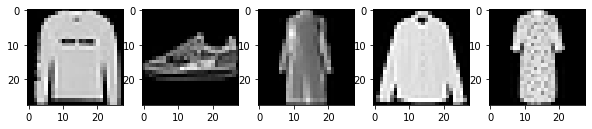

In [ ]:
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [ ]:
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    self.linear = torch.nn.Linear(28*28,10)

  def forward(self, x):
    x = x.view(-1,28*28)
    transformed_x = self.linear(x)
    return transformed_x

net = LinearReg().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)



Train the network.

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 0.962718647044859, Test loss 0.7394164491231274
Epoch 1, Train loss 0.6678871326863385, Test loss 0.6467844312358054
Epoch 2, Train loss 0.6037305348209226, Test loss 0.6036576053519158
Epoch 3, Train loss 0.5682870054136969, Test loss 0.579158300996586
Epoch 4, Train loss 0.5456478984307632, Test loss 0.5595327822645758
Epoch 5, Train loss 0.5288768831346589, Test loss 0.5468165380939557
Epoch 6, Train loss 0.5162919589769103, Test loss 0.5357637635082196
Epoch 7, Train loss 0.5059161315213389, Test loss 0.52770537024091
Epoch 8, Train loss 0.4975833669781431, Test loss 0.5209156887926114
Epoch 9, Train loss 0.490400868263453, Test loss 0.515774294828913
Epoch 10, Train loss 0.4842610348230486, Test loss 0.5096913139531567
Epoch 11, Train loss 0.4788224052455125, Test loss 0.506357757528876
Epoch 12, Train loss 0.47393937836260175, Test loss 0.5024205670235263
Epoch 13, Train loss 0.4699769388796932, Test loss 0.5000300154944134
Epoch 14, Train loss 0.4662028041316

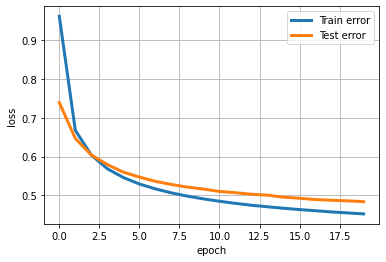

In [ ]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Evaluate on the entire dataset.

In [ ]:
predicted_output = net(images)
print(torch.max(predicted_output, 1))
fit = Loss(predicted_output, labels)
print(labels)

torch.return_types.max(
values=tensor([ 6.0837,  3.1317,  9.1140,  7.7421,  6.6457,  6.1580, 10.1397,  4.2204,
         6.8977, 11.5810, 10.6048, 10.2698,  6.7915,  4.7407,  9.4972,  4.4949],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 1, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0'))
tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
